### ShapFS: combining domain invariant features for Glucose and Lactic acid

In [69]:

import numpy as np
from sklearn.model_selection import train_test_split
from traintest import *
from dataloader import DataLoad
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SHAP-domain invariant features (SHAP-DIF)

In [70]:
D = DataLoad(glucose=True)
D.load_data()
Xs, ys, Xt, yt, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl

In [71]:
glucose_features =  np.loadtxt('./results/feature_index_ranked_glucose.txt', delimiter=',')
lacticacid_features =  np.loadtxt('./results/feature_index_ranked_lacticacid.txt', delimiter=',')

There are 36 unique features from combined domain invaraint features


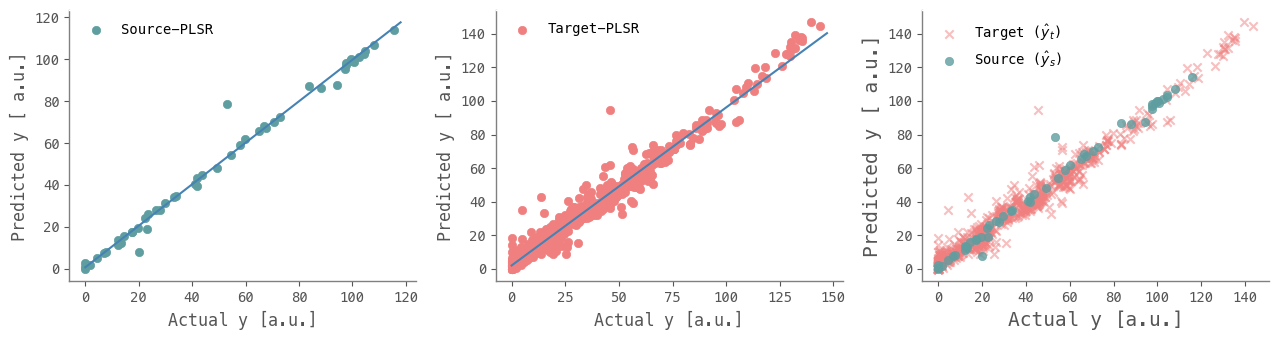

,Test on,Model,R-sq,RMSE,RMSEP [%],RPD
0,Source,PLSR,0.99,4.22373,3.65095,8.70258
1,Target,PLSR,0.97,5.80917,4.04212,5.35909


In [72]:
dif_comb = np.sort(np.unique(np.append(glucose_features[:18], lacticacid_features[:18]))).astype(int)
print(f"There are {len(dif_comb)} unique features from combined domain invaraint features")
# take only combined domain invariant features
Xs_difG,  Xt_difG, wl_dif = Xs[:,dif_comb], Xt[:,dif_comb], wl[dif_comb]
Xs_trainG, Xs_testG, ys_trainG, ys_testG = train_test_split(Xs_difG, ys, test_size=0.2, random_state=42)
models = train(Xs_trainG, ys_trainG, plsr_comp=12)
test(models, Xs_testG, ys_testG, Xt_difG, yt)

#### Lactic acid with combined domain invariant features (DIF) using ShapFS method

In [73]:
D = DataLoad(glucose=False)
D.load_data()
XsL, ysL, XtL, ytL, wl = D.X_source, D.y_source, D.X_target, D.y_target, D.wl

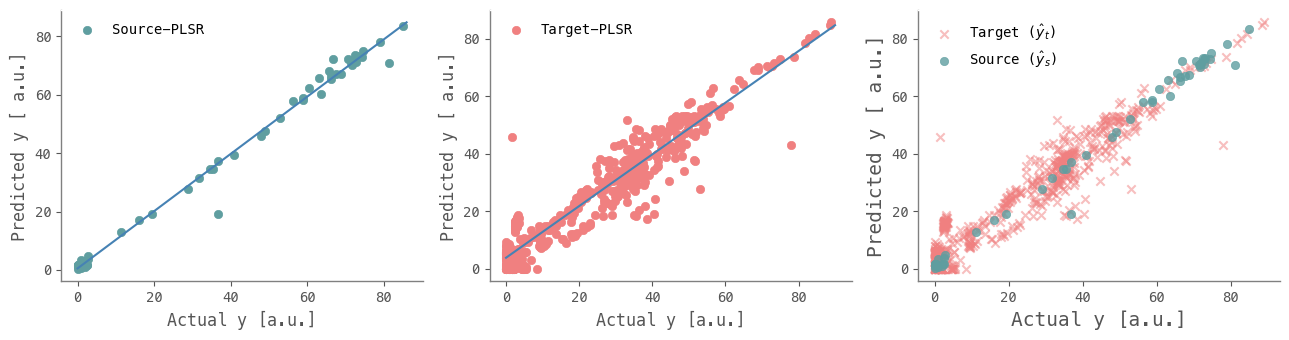

,Test on,Model,R-sq,RMSE,RMSEP [%],RPD
0,Source,PLSR,0.99,3.14674,3.70435,9.64158
1,Target,PLSR,0.9,6.28748,7.07505,3.23733


In [74]:
# take only combined domain invariant features
Xs_difL, Xt_difL,  wl_dif = XsL[:,dif_comb], XtL[:,dif_comb],  wl[dif_comb]
Xs_trainL, Xs_testL, ys_trainL, ys_testL = train_test_split(Xs_difL, ysL, test_size=0.2, random_state=42)
models = train(Xs_trainL, ys_trainL, plsr_comp=12)
test(models, Xs_testL, ys_testL, Xt_difL, ytL)